In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Behavioral Analysis with Explainable Logistic Regression

Employee Attrition Isn’t Random

In [2]:
df = pd.read_csv(r"/kaggle/input/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Project objective 

Explore behavioral and workplace patterns associated with employee attrition using exploratory data analysis

In [4]:
df.shape

(1470, 35)

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.describe().round(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.0,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.0,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.0,602.02,1.09,20.33,0.71,1.11,...,1.08,0.0,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.0,1.00,1.00,30.00,1.00,1.00,...,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.0,491.25,2.00,48.00,2.00,1.00,...,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.0,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.0,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.0,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


EmployeeCount = always 1

StandardHours = always 80

These are structural columns, their value doesn't change in the dataset --> they are safe to drop

In [7]:
df = df.drop(columns=['EmployeeNumber', 'StandardHours', 'EmployeeCount'])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# 1. Define attrition problem

In [8]:
df_check = df.groupby(['JobLevel', 'Attrition'])['YearsAtCompany'].agg(['mean', 'median', 'max', 'std']).round(2).unstack()

df_check

mean        median       max        std       
Attrition     No    Yes     No   Yes  No Yes     No    Yes
JobLevel                                                  
1           4.24   3.08    4.0   2.0  20  17   3.13   2.89
2           6.91   5.25    6.0   5.0  20  15   4.16   3.65
3           9.35   9.56    9.0   8.5  26  40   5.54   8.58
4          13.76  16.40   12.0  19.0  37  23   9.20   8.82
5          14.53  22.80   15.0  24.0  36  32  10.73  10.85

- higher JobLevel usually means longer tenure, so longer YearsAtCompany inside higher levels is expected
- Leavers have shorter tenure than stayers until level 4 and 5

There are two different attrition mechanisms:

🟢 Early-career churn

Level 1–2:

- people test jobs, early-career employees may still be exploring fit, growth, or opportunities

- mobility is higher

🔵 Late-career exit

Level 4–5:

- long-tenured employees eventually leave

- possibly promotion, burnout or retirement-like patterns

# 2. Identify strongest behavioral signals

Checking working conditions - work life balance

Is work-life balance linked to early vs late exits?

In [9]:
df_check2 = df.groupby(['Attrition', 'WorkLifeBalance'])['YearsAtCompany'].agg(['mean', 'median', 'max', 'std']).round(2)
df_check2

mean  median  max   std
Attrition WorkLifeBalance                         
No        1                6.85     5.0   29  6.12
          2                7.45     6.0   37  5.90
          3                7.34     5.0   36  6.15
          4                7.59     5.5   34  6.25
Yes       1                5.24     4.0   23  5.28
          2                5.33     4.0   40  6.49
          3                5.18     3.0   33  6.20
          4                4.37     3.0   15  4.03

- across all WorkLifeBalance levels, employees who leave tend to have shorter tenure, suggesting attrition may be more strongly linked to career stage than perceived work life balance

In [10]:
df.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True).round(2)

WorkLifeBalance  Attrition
1                No           0.69
                 Yes          0.31
2                No           0.83
                 Yes          0.17
3                No           0.86
                 Yes          0.14
4                No           0.82
                 Yes          0.18
Name: proportion, dtype: float64

- still, the employees reporting the lowest work-life balance show substantially higher attrition rates compared to other groups

Conclusions:
- Early-career employees leave more often
- But poor balance may increase the likelihood of leaving

Distance from home

<Axes: xlabel='DistanceFromHome', ylabel='Yes'>

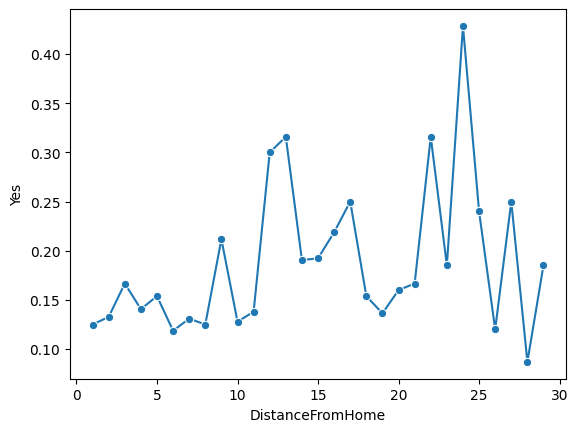

In [11]:
dist = (df.groupby('DistanceFromHome')['Attrition'].value_counts(normalize=True).unstack()['Yes'].reset_index())

sns.lineplot(data=dist, x='DistanceFromHome', y='Yes', marker='o')

Attrition rates at individual commute distances are volatile due to low subgroup sizes

In [12]:
df['DistanceBand'] = pd.cut(df['DistanceFromHome'],bins=[0,5,10,20,30],labels=['Close','Medium','Far','Very Far'])

/tmp/ipykernel_17/3488578517.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  band_rate = (df.groupby('DistanceBand')['Attrition'].value_counts(normalize=True).unstack()['Yes'].reset_index())


<Axes: xlabel='DistanceBand', ylabel='Yes'>

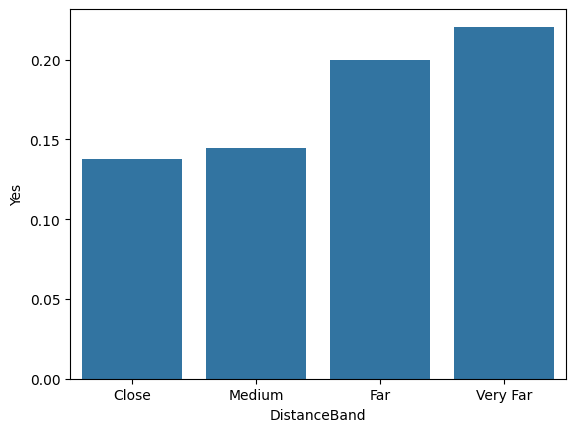

In [13]:
band_rate = (df.groupby('DistanceBand')['Attrition'].value_counts(normalize=True).unstack()['Yes'].reset_index())

sns.barplot(data=band_rate, x='DistanceBand', y='Yes')

- employees in the ‘Very Far’ commute group show roughly 22% attrition
- attrition appears to increase as commuting distance increases

# 3. Test structural factors

Checking working conditions - EnvironmentSatisfaction

In [14]:
df.groupby('EnvironmentSatisfaction')['Attrition'].value_counts(normalize=True).round(2)

EnvironmentSatisfaction  Attrition
1                        No           0.75
                         Yes          0.25
2                        No           0.85
                         Yes          0.15
3                        No           0.86
                         Yes          0.14
4                        No           0.87
                         Yes          0.13
Name: proportion, dtype: float64

- employees reporting low environment satisfaction have notably higher attrition rates, suggesting workplace experience may be associated with retention outcomes

Checking working conditions - JobInvolvement

In [15]:
df.groupby('JobInvolvement')['Attrition'].value_counts(normalize=True).round(2)

JobInvolvement  Attrition
1               No           0.66
                Yes          0.34
2               No           0.81
                Yes          0.19
3               No           0.86
                Yes          0.14
4               No           0.91
                Yes          0.09
Name: proportion, dtype: float64

- as JobInvolvement increases, attrition drops steadily

# 4. Combine signals into risk patterns

Within each combination of JobInvolvement and JobLevel, what proportion of employees leave?

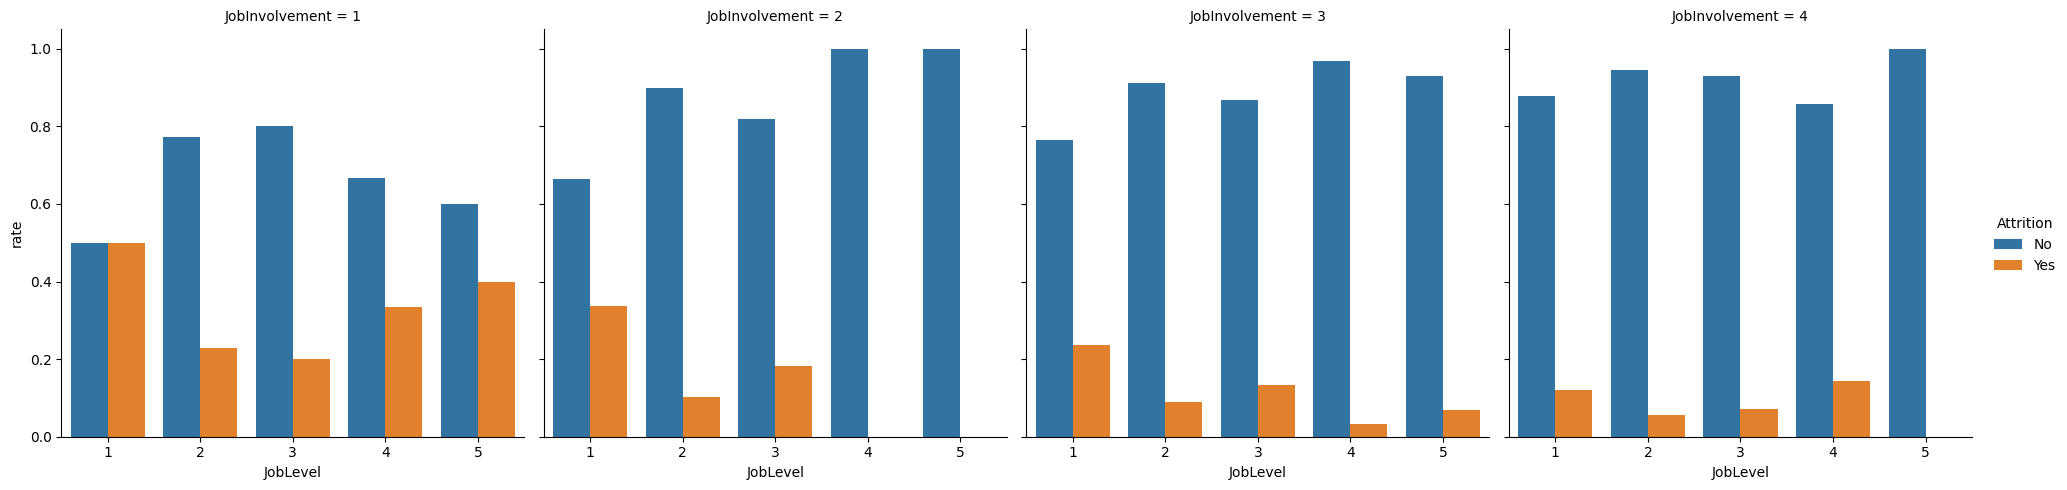

In [16]:
plot_df = (df.groupby(['JobInvolvement','JobLevel'])['Attrition'].value_counts(normalize=True).rename('rate').reset_index())

sns.catplot(
    data=plot_df,
    x='JobLevel',
    y='rate',
    hue='Attrition',
    col='JobInvolvement',
    kind='bar'
)

- Level 1: 50% attrition - that’s extremely high compared to earlier averages

Even across levels: 23%, 20%, 33%, 40% — still elevated.

<Axes: xlabel='JobLevel', ylabel='JobInvolvement'>

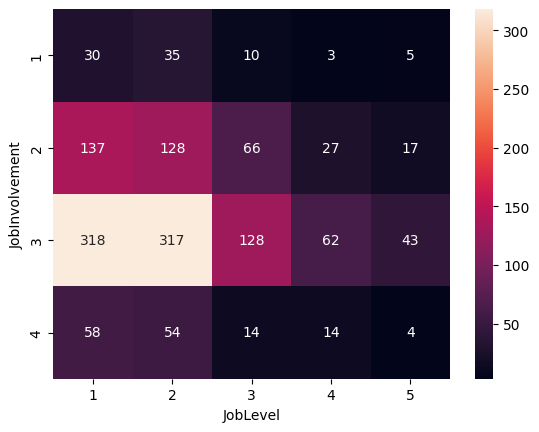

In [17]:
heat3 = (df.groupby(['JobInvolvement', 'JobLevel'])['Attrition'].size().unstack()).round(1)

sns.heatmap(heat3, annot=True, fmt='g')

- only a handful of people exist in the higher lob level categories
- most employees sit around moderate involvement (3) and lower–mid job levels (1–2)

Conclusion

The relationship between low job involvement and higher attrition appears consistent across larger groups, but extreme retention patterns at senior levels should be interpreted cautiously due to small sample sizes.

How do JobInvolvement and EnvironmentSatisfaction move together?

In [18]:
df[['JobInvolvement', 'EnvironmentSatisfaction']].corr().round(2)

,JobInvolvement,EnvironmentSatisfaction
JobInvolvement,1.00,-0.01
EnvironmentSatisfaction,-0.01,1.00


It’s basically zero relationship.

Employees’ job involvement levels appear largely unrelated to how satisfied they feel with their environment.

So far, there are 3 parallel signals:

Variable	                    Pattern with Attrition	        Structural Independence

- WorkLifeBalance	            Moderate	                    Unknown

- EnvironmentSatisfaction	    Strong gradient	                Independent from JobInvolvement

- JobInvolvement	            Very strong gradient	        Independent from EnvironmentSatisfaction

<Axes: xlabel='EnvironmentSatisfaction', ylabel='JobInvolvement'>

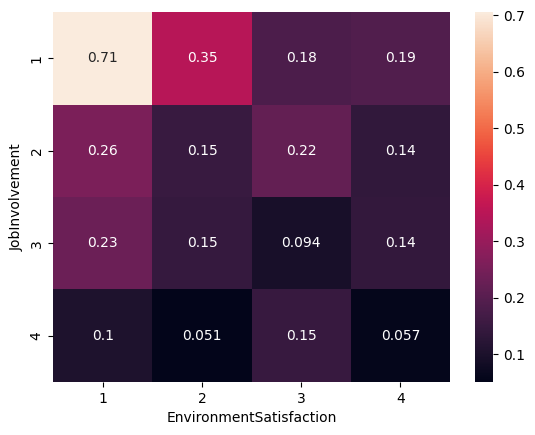

In [19]:
heat2 = (df.groupby(['JobInvolvement','EnvironmentSatisfaction'])['Attrition'].value_counts(normalize=True).unstack()['Yes'].unstack())

sns.heatmap(heat2, annot=True)

JobInvolvement = 1 & EnvironmentSatisfaction = 1 = Attrition ≈ 70%

When both signals are low, attrition increases dramatically

Conclusion: 

Attrition appears highest among employees reporting both low job involvement and low environmental satisfaction, suggesting multiple dimensions of employee experience may jointly influence retention risk.

In [20]:
df.groupby(['JobInvolvement', 'EnvironmentSatisfaction'])['Attrition'].size()

JobInvolvement  EnvironmentSatisfaction
1               1                           17
                2                           23
                3                           22
                4                           21
2               1                           74
                2                           60
                3                          124
                4                          117
3               1                          164
                2                          165
                3                          266
                4                          273
4               1                           29
                2                           39
                3                           41
                4                           35
Name: Attrition, dtype: int64

<Axes: xlabel='EnvironmentSatisfaction', ylabel='JobInvolvement'>

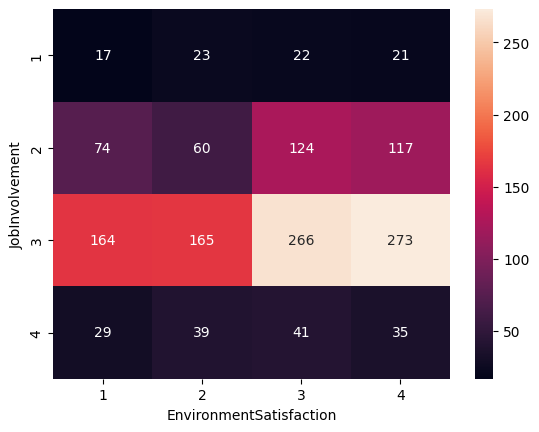

In [21]:
counts = (df.groupby(['JobInvolvement','EnvironmentSatisfaction'])['Attrition'].size().unstack())

sns.heatmap(counts, annot=True, fmt='g')

Most employees report moderate-to-high involvement and environment satisfaction, so the extreme-risk group is not the majority, it is 17 people. 

# 5. Signals in departments

In [22]:
df.groupby('Department')['Attrition'].value_counts(normalize=True).round(2).unstack()['Yes']

Department
Human Resources           0.19
Research & Development    0.14
Sales                     0.21
Name: Yes, dtype: float64

Attrition rates appear higher in Sales (~21%) compared to Research & Development (~14%), suggesting potential differences in role structure or work experience across departments.

Number of leavers per department

[Text(0, 0, '12'), Text(0, 0, '133'), Text(0, 0, '92')]

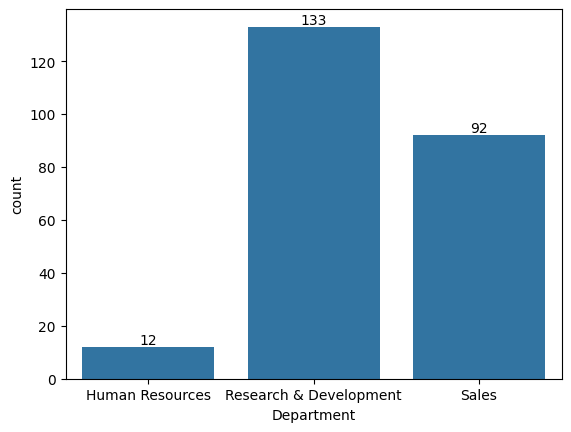

In [23]:
attr_yes = (df[df['Attrition'] == 'Yes'].groupby('Department').size().reset_index(name='count'))

ax = sns.barplot(data=attr_yes, x='Department', y='count')
ax.bar_label(ax.containers[0], fmt="%d")

Sales

- Higher attrition rate (~21%)

- Smaller workforce

Interpretation:

- Higher risk environment — something about Sales environment may be pushing people out faster


Research & Development

- Lower attrition rate (~14%)

- Huge workforce

Interpretation:

- Largest contributor to total attrition volume simply because of size



Human Resources

- Small size

- Moderate risk

- Lower operational impact


# 6. Predictive Modeling — Testing Behavioral Signals

Objective: predict attrition risk using the behavioral patterns discovered in EDA

Model: Logistic Regression

Based on employee characteristics, what is the probability they leave?

In [24]:
df['Attrition_num'] = df['Attrition'].map({'No': 0, 'Yes': 1})

In [25]:
df[['Attrition', 'Attrition_num']].head()

,Attrition,Attrition_num
0,Yes,1
1,No,0
2,Yes,1
3,No,0
4,No,0


In [26]:
features = [
    'JobInvolvement',
    'EnvironmentSatisfaction',
    'WorkLifeBalance',
    'Department',
    'DistanceBand',
    'JobLevel'
]

X = df[features]
y = df['Attrition_num']

In [27]:
X = pd.get_dummies(X, drop_first=True)

In [28]:
X.head()

,JobInvolvement,EnvironmentSatisfaction,WorkLifeBalance,JobLevel,Department_Research & Development,Department_Sales,DistanceBand_Medium,DistanceBand_Far,DistanceBand_Very Far
0,3,2,1,2,False,True,False,False,False
1,2,3,3,2,True,False,True,False,False
2,2,4,3,1,True,False,False,False,False
3,3,4,3,1,True,False,False,False,False
4,3,1,3,1,True,False,False,False,False


In [29]:
model = LogisticRegression(max_iter=1000)

In [30]:
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [31]:
coef = pd.Series(model.coef_[0], index=X.columns).sort_values()

In [32]:
coef.round(2)

JobLevel                            -0.65
JobInvolvement                      -0.49
Department_Research & Development   -0.43
EnvironmentSatisfaction             -0.26
WorkLifeBalance                     -0.24
DistanceBand_Medium                  0.04
Department_Sales                     0.31
DistanceBand_Far                     0.51
DistanceBand_Very Far                0.57
dtype: float64

# 7. Model results

Negative side - factors related to lower attrition risk

- JobLevel (-0.65) — strongest negative: higher job level → lower probability of leaving

- JobInvolvement (-0.49): more engagement = lower attrition risk

- R&D employees appear more stable than HR

- EnvironmentSatisfaction & WorkLifeBalance  - better experience → slightly lower attrition risk


Positive side - factors linked to HIGHER attrition risk

- DistanceBand_Very Far (+0.57) — strongest risk signal, very long commutes strongly increase attrition probability
- DistanceBand_Far (+0.51) - a gradient effect
- Department_Sales (+0.31) - sales increases attrition risk relative to HR baseline

# Final conclusion

Logistic regression results suggest that attrition risk is most strongly associated with behavioral experience factors such as job involvement and satisfaction, alongside lifestyle-related friction from long commuting distances. Structural variables like job level appear to stabilize retention but do not fully explain observed patterns




# Key Drivers of Attrition

This analysis explored employee attrition through a behavioral lens, combining exploratory data analysis with an interpretable logistic regression model.
Across both approaches, attrition risk appears most strongly associated with two broad dimensions:

Employee Experience (Primary Signals)

- Variables related to engagement and workplace experience showed the most consistent relationship with attrition:

- Higher JobInvolvement and EnvironmentSatisfaction were associated with reduced attrition risk.

- Work-life balance also showed a stabilizing effect, though smaller in magnitude.

- Logistic regression coefficients reinforced these findings, suggesting engagement-related factors act as strong retention signals.

These results suggest that employees’ internal connection to their work environment may play a larger role in retention than structural characteristics alone.

Lifestyle Friction — Commuting Distance (Secondary but Strong Gradient)

Grouping commute distance into behavioral bands revealed a clear gradient:

- Attrition risk increased progressively from close to very long commutes.

- The logistic regression model showed increasingly positive coefficients for longer distance bands, reinforcing this trend.

While the analysis cannot establish causation, the consistent gradient suggests that external lifestyle factors may interact with workplace experience to influence departure decisions.

Structural Context — Department and Career Stage

Sales showed the highest attrition risk, while Research & Development accounted for the largest number of departures due to workforce size.

Higher JobLevel appeared to reduce attrition risk, consistent with increased stability at more senior career stages.

These findings highlight the importance of distinguishing between attrition risk (rate) and organizational impact (volume).

# Practical HR Implications

From a business perspective, several actionable themes emerge:

- Strengthening employee engagement and involvement may provide the largest retention impact.

- Commute-related strain could represent a secondary risk factor worth monitoring, particularly for early-career employees.

- Department-level strategies may need to balance risk intensity (Sales) with operational scale (Research & Development).